# Plots

One of the most common things to do with data will be making plots, both for understanding and for publication.  Let's use the matplotlib pyplot module to start with basic plots and expand to more complicated things

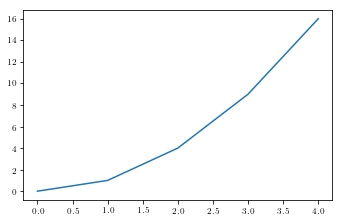

In [88]:
import matplotlib.pyplot as plt
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
fig, ax = plt.subplots(1)
ax.plot( xVals, yVals )
plt.show( fig )
plt.close( fig )

This seems very simple and basic, but let's discuss the objects here to more easily understand how to add new things.  
* We're importing a the matplotlib.pyplot module, which gives us access to functions like subplots. 
* When subplots is called without any arguments, a single plot is made 
* We have an internal name for our figure (fig) and identify the specific set of axes (ax) we are using (this allows us to have multiple subplots on the same figure)
* We can then add things - think about if we are acting on the whole figure, or the individual subplot

We can add things like labels and a title to help provide context.
* Labels work on the axes
* The title is for the whole figure

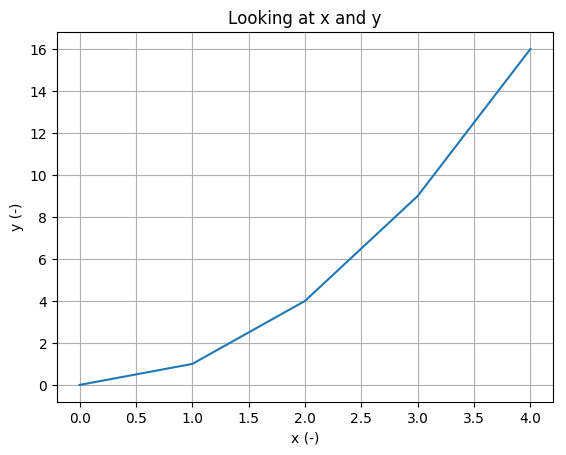

In [97]:
import matplotlib.pyplot as plt
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
figb, ax = plt.subplots()
ax.plot( xVals, yVals )
ax.set_xlabel( 'x (-)' )
ax.set_ylabel( 'y (-)' )
ax.grid()
plt.title( 'Looking at x and y' )
plt.show( figb )
plt.close( figb )

We can change how the data is shown on the plot.  Some common things to change are linestyle, color and marker. Look at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot for a complete list of options and https://matplotlib.org/2.0.2/examples/color/named_colors.html for the named colors.

You can either specify these things individually, or with shorthand notation

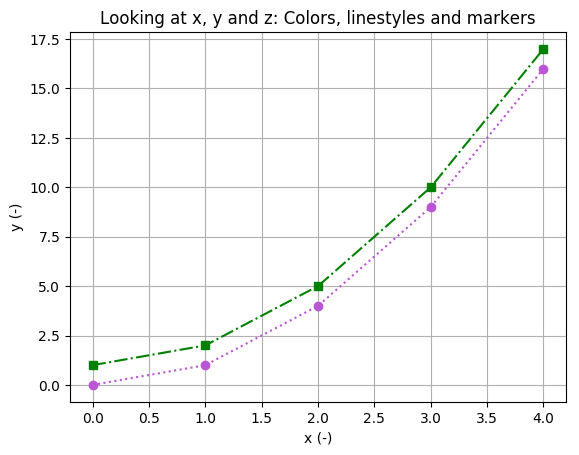

In [98]:
import matplotlib.pyplot as plt
import numpy as np
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
zVals = np.array( yVals ) + 1
figc, ax = plt.subplots()
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':' )
ax.plot( xVals, zVals, 'gs-.' )
ax.set_xlabel( 'x (-)' )
ax.set_ylabel( 'y (-)' )
ax.grid()
plt.title( 'Looking at x, y and z: Colors, linestyles and markers' )
plt.show( figc )
plt.close( figc )

Let's take advantage of adding an additional subplot, and change the y-axes of the different plots separately. We use the sharex to indicate that the x-axes should be the same

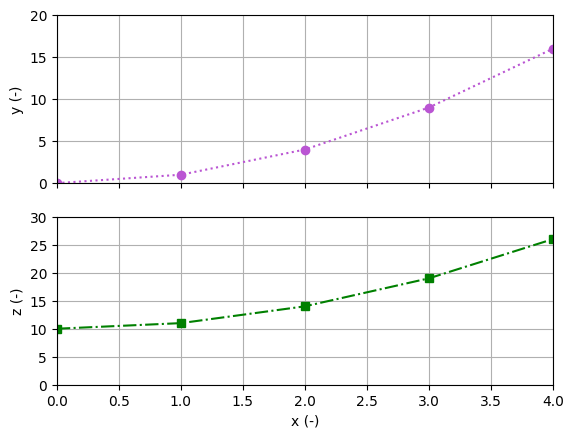

In [99]:
import matplotlib.pyplot as plt
import numpy as np
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
zVals = np.array( yVals ) + 10
figd, [axA, axB]  = plt.subplots( 2, sharex = True )
axA.plot( xVals, yVals, color = 'mediumorchid', marker = 'o', linestyle = ':' )
axB.plot( xVals, zVals, 'gs-.' )

axA.set_ylabel( 'y (-)' )
axB.set_ylabel( 'z (-)' )
axB.set_xlabel( 'x (-)' )

axA.grid()
axB.grid()

axA.set_xlim( [ 0 , 4 ] )

axA.set_ylim( [ 0, 20 ] )
axB.set_ylim( [ 0, 30 ] )

plt.show( figd )
plt.close( figd )

We can also add legends and text to our figures.  

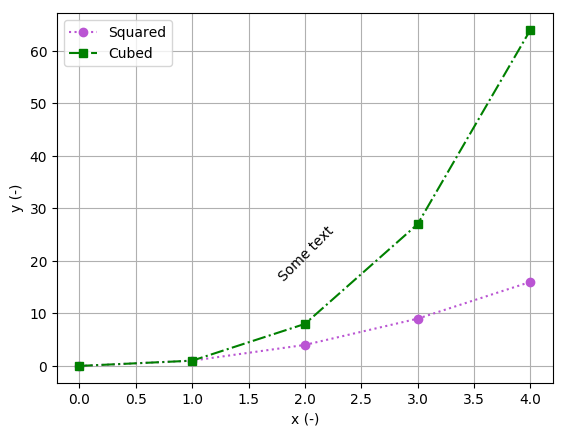

In [100]:
import matplotlib.pyplot as plt
import numpy as np
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
zVals = [ 0, 1, 8, 27, 64 ]
fige, ax = plt.subplots()
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':', label = 'Squared')
ax.plot( xVals, zVals, 'gs-.', label = 'Cubed' )
plt.text( 1.75, 25, 'Some text', rotation=45 )
ax.set_xlabel( 'x (-)' )
ax.set_ylabel( 'y (-)' )
ax.grid()
ax.legend( loc = 2 )
plt.show(fige)
plt.close(fige)

Everything so far has just been in the jupyter notebook environment.  We can save the files using the savefig function.  You can then use the Home tab within jupyter to download the file to your local machine.

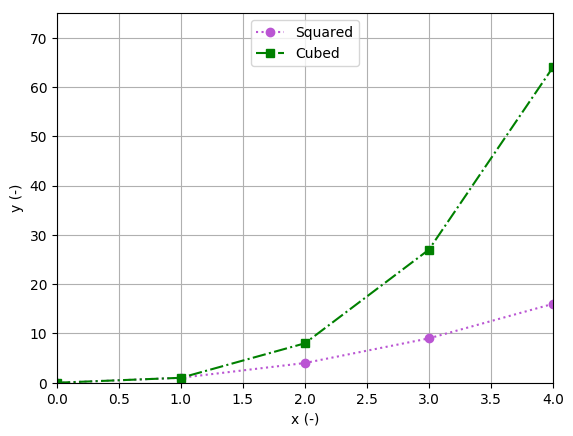

In [101]:
import matplotlib.pyplot as plt
import numpy as np
xVals = [ 0, 1, 2, 3, 4 ]
yVals = [ 0, 1, 4, 9, 16 ]
zVals = [ 0, 1, 8, 27, 64 ]
figf, ax = plt.subplots()
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':', label = 'Squared')
ax.plot( xVals, zVals, 'gs-.', label = 'Cubed' )
ax.set_xlabel( 'x (-)' )
ax.set_ylabel( 'y (-)' )
ax.set_xlim( [ 0, 4 ] )
ax.set_ylim( [ 0, 75 ] )
ax.grid()
ax.legend( loc = 9 )
plt.savefig( 'mySampleFigure.png' )
plt.show( figf )
plt.close( figf )

We're just scratching the surface of what you can do with plotting.  A great resources is the matplotlib gallery, where you can scroll through figures and then view the source code for the ones you are interested in.  
https://matplotlib.org/2.1.0/gallery/index.html

Let's look at some ways to make our plots ready for publication.  First, let's start with a simple plot of the enrollment at Penn State through the years

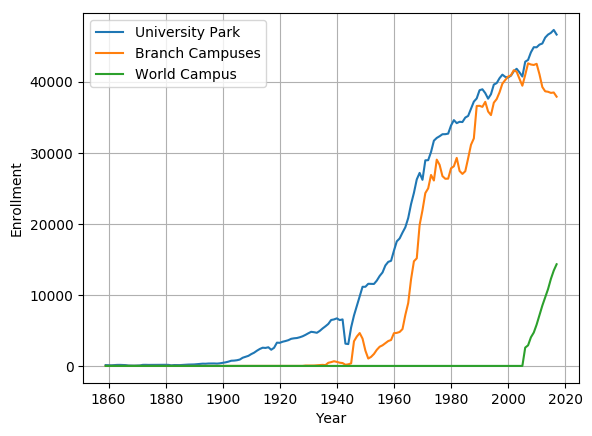

In [102]:
#import matplotlib.rcParams as rcParams
import matplotlib.pyplot as plt
import numpy as np
year, universityPark, otherLocs, worldCampus, totPSU = np.loadtxt('pennStateEnroll.dat', unpack=True, comments='#', skiprows=2)

figPSU, ax = plt.subplots()
ax.plot( year, universityPark, label = 'University Park')
ax.plot( year, otherLocs, label = 'Branch Campuses')
ax.plot( year, worldCampus, label = 'World Campus')
ax.set_xlabel( 'Year' )
ax.set_ylabel( 'Enrollment' )
ax.grid()
ax.legend( loc = 2 )
plt.show(figPSU)
plt.close(figPSU)

This is easy to produce and helps us understand what is happening quickly.  It's not quite ready for publication though. We'll use the rcParams package within matplotlib to give us control over the entire figure rather than change things individually. (This helps because you can get your parameters set up once, then apply them for all of the figures you use.) Note that you can keep all of the params in a matplotlibrc file - see https://matplotlib.org/users/customizing.html for more information

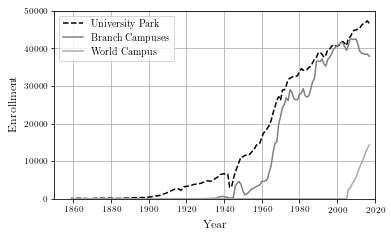

In [95]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set up the figure specifications
fig_width_pt = 400.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27               # Convert pt to inch
golden_mean = (np.sqrt( 5 ) - 1.0 ) / 2.0         # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * golden_mean      # height in inches
fig_size =  [ fig_width, fig_height ]

params = {'backend': 'ps',
          'font.family': 'serif',
          'axes.labelsize': 12,
          'legend.fontsize': 10,
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'text.usetex': True,
          'figure.dpi': 320, # Look this up in your journal's style guide
          'figure.figsize': fig_size}
mpl.rcParams.update(params)

year, universityPark, otherLocs, worldCampus, totPSU = np.loadtxt('pennStateEnroll.dat', unpack=True, comments='#', skiprows=2)

figPSU, ax = plt.subplots()
ax.plot( year, universityPark, color='black', linestyle='--',  label = 'University Park')
ax.plot( year, otherLocs, color='grey', label = 'Branch Campuses')
ax.plot( year, worldCampus, color='darkgrey', label = 'World Campus')
ax.set_xlabel( 'Year' )
ax.set_ylabel( 'Enrollment' )
ax.set_xlim( [ 1850, 2020 ] )
ax.set_ylim( [ 0, 50000 ] )
ax.grid()
ax.legend( loc = 2 )
plt.tight_layout() # Might be helpful if you have multiple subplots or lots of text
plt.savefig( 'PSUEnrollment.eps',rasterized=True ) # Set rasterization for true to keep any transparencies in EPS files
plt.show(figPSU)
plt.close(figPSU)

### Random possibly helpful notes

In [96]:
# You can reset the defaults using the command
# The rcParams will hold
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# There is a command to switch over to greyscale - not recommended, but easily possible
import matplotlib as mpl
#mpl.style.use('grayscale')
